# 02 - Exploratory Data Analysis

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
sns.set_context('notebook')
sns.set_palette('deep')
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Aux. Functions

In [152]:
def subset_flights2(df, flyFrom='all', flyTo='all', dDate='all', dTime='all', flight_no='all'):
    params = locals()
    del params['df']
    for arg, value in params.items():
        if value != 'all':
            df = df[df[arg] == value]
    return df

In [153]:
def subset_flights(df, orig='all', dest='all', dDate='all', dTime='all', flight_no='all'):
    if orig != 'all':
        df = df[df['flyFrom'] == orig]
    if dest != 'all':
        df = df[df['flyTo'] == dest]
    if dDate != 'all':
        df = df[df['dDate'] == dDate]
    if dTime != 'all':
        df = df[df['dTime'] == dTime]
    if flight_no != 'all':
        df = df[df['flight_no'] == flight_no]
        
    return df

In [154]:
def subset_by_route(df, route):
    if type(route) is str:
        orig = route.split('-')[0]
        dest = route.split('-')[1]
    else:
        orig = route[0]
        dest = route[1]
    df = df[(df['flyFrom'] == orig) & (df['flyTo'] == dest)]
    return df

In [155]:
def plot_hist_price_by_route(df, log=True):
    df = df.copy()
    routes = df['flyFrom'] +'-'+ df['flyTo']
    routes = routes.unique()
    if log:
        df['price'] = np.log(df['price'])
    f, axes = plt.subplots(2, 5, figsize=(15,9));
    axes = axes.ravel();
    for idx, route in enumerate(routes):
        df_route = subset_by_route(df,route)
        sns.histplot(df_route['price'], kde=False, ax=axes[idx]);
        axes[idx].set_title(route)
    plt.tight_layout()
        

### Load data

In [156]:
flights = pd.read_csv('../data/interim/flights_interim.csv')

In [157]:
flights.head()

,collectionDate,dDate,dTime,aDate,aTime,dTimeUTC,aTimeUTC,flyFrom,flyTo,airlines,...,distance,route,price,seats,cityFrom,cityCodeFrom,cityTo,cityCodeTo,countryFrom,countryTo
0,2021-01-31,2021-02-01,15:00,2021-02-01,16:25,2021-02-01 14:00:00,2021-02-01 15:25:00,MAD,BCN,UX,...,483.25,MAD -> BCN,78,NaN,Madrid,MAD,Barcelona,BCN,Spain,Spain
1,2021-01-31,2021-02-01,09:35,2021-02-01,10:50,2021-02-01 08:35:00,2021-02-01 09:50:00,MAD,BCN,VY,...,483.25,MAD -> BCN,91,NaN,Madrid,MAD,Barcelona,BCN,Spain,Spain
2,2021-01-31,2021-02-01,19:45,2021-02-01,21:05,2021-02-01 18:45:00,2021-02-01 20:05:00,MAD,BCN,IB,...,483.25,MAD -> BCN,91,5.0,Madrid,MAD,Barcelona,BCN,Spain,Spain
3,2021-01-31,2021-02-01,19:15,2021-02-02,08:50,2021-02-01 18:15:00,2021-02-02 07:50:00,MAD,BCN,UX,...,483.25,MAD -> BCN,108,3.0,Madrid,MAD,Barcelona,BCN,Spain,Spain
4,2021-01-31,2021-02-01,14:50,2021-02-02,08:50,2021-02-01 13:50:00,2021-02-02 07:50:00,MAD,BCN,UX,...,483.25,MAD -> BCN,112,3.0,Madrid,MAD,Barcelona,BCN,Spain,Spain


In [158]:
flights.drop_duplicates(inplace=True)
# Data transformations needed for some visualization:
flights['orig-dest'] = flights['flyFrom'] +'-'+ flights['flyTo']
#flights['airlines_'] = flights['airlines'].apply(lambda x: x.split(',')[0])
flights['flight_no'] = flights['airlines'].apply(lambda x: x.split(',')[0])+''+flights['flight_no'].astype(str)

In [159]:
flights['flight_no'].head()

0    UX7703
1    VY1003
2    IB1946
3    UX6097
4    UX6067
Name: flight_no, dtype: object

### Features Overview

In [160]:
flights.columns

Index(['collectionDate', 'dDate', 'dTime', 'aDate', 'aTime', 'dTimeUTC',
       'aTimeUTC', 'flyFrom', 'flyTo', 'airlines', 'flight_no', 'fly_duration',
       'distance', 'route', 'price', 'seats', 'cityFrom', 'cityCodeFrom',
       'cityTo', 'cityCodeTo', 'countryFrom', 'countryTo', 'orig-dest'],
      dtype='object')

Target:
* price: Ticket price of a flight

Features:
* **collectionDate**: date flight data was taken
* **dDate**: departure day
* **dTime**: departure time
* **aDate**: arrival day
* **aTime**: arrival time
* **dTimeUTC**, **aTimeUTC**: departure and arrival time in UTC timezone
* **flyFrom**: origin airport IATA code
* **flyTo**: destination airport IATA code
* **airlines**: self-explanatory
* **flight_no**: identification plain number
* **fly_duration**, **distance**: self-explanatory
* **route**: airports through flight passes
* **seats**: availability
* **cityFrom**, **cityCodeFrom**, **cityTo**, **cityCodeTo**: different id's for the origin and destination cities
* **countryFrom**, **countryTo**: origin and dest countries

Numerical: distance, fly_duration, seats, price
\
Categorical: flyFrom, flyTo, airlines, route

In [161]:
flights[['distance', 'fly_duration', 'seats','price']].describe()

,distance,fly_duration,seats,price
count,390718.000000,390718.000000,307918.000000,390718.000000
mean,4196.100196,20.958180,2.588556,345.477754
std,3630.947139,12.061744,2.342781,415.804146
min,202.180000,0.750000,1.000000,20.000000
25%,1110.280000,12.750000,1.000000,108.000000
50%,1774.110000,20.500000,1.000000,260.000000
75%,9075.770000,27.416667,4.000000,402.000000
max,10097.940000,60.000000,8.000000,8840.000000


In [162]:
# TODO: comment descriptive statitics when I have final dataset

In [214]:
flights.isna().sum()

collectionDate        0
dDate                 0
dTime                 0
aDate                 0
aTime                 0
dTimeUTC              0
aTimeUTC              0
flyFrom               0
flyTo                 0
airlines              0
flight_no             0
fly_duration          0
distance              0
route                 0
price                 0
seats             82800
cityFrom              0
cityCodeFrom          0
cityTo                0
cityCodeTo            0
countryFrom           0
countryTo             0
orig-dest             0
log_price             0
hopping               0
hops                  0
dtype: int64

### Price

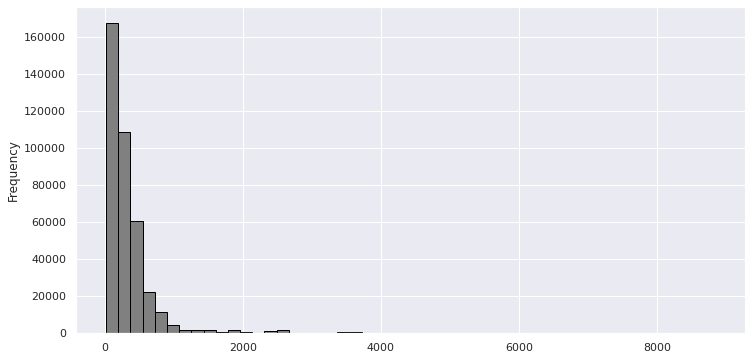

In [163]:
flights['price'].plot(kind='hist', 
                            bins=50, 
                            figsize=(12,6), 
                            facecolor='grey',
                            edgecolor='black');

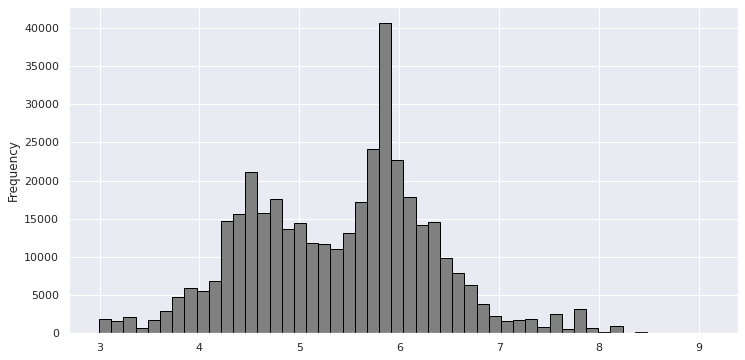

In [164]:
flights['log_price'] = np.log(flights['price'])
flights['log_price'].plot(kind='hist', 
                            bins=50, 
                            figsize=(12,6), 
                            facecolor='grey',
                            edgecolor='black');

#### Log-Price histogram by route

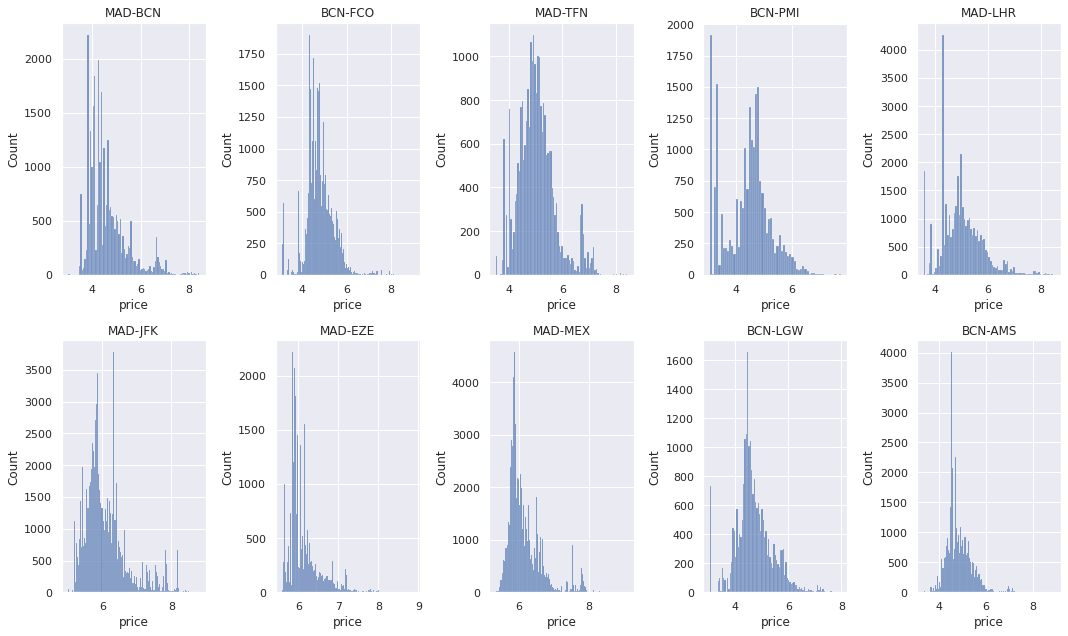

In [165]:
plot_hist_price_by_route(flights, log=True);

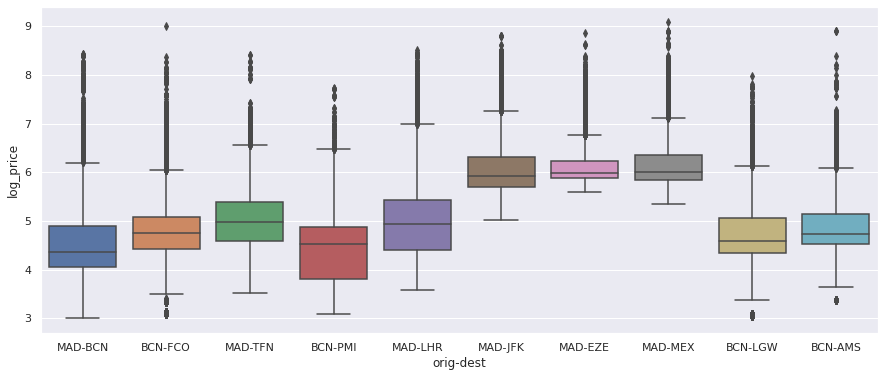

In [166]:
flights['orig-dest'] = flights['flyFrom'] +'-'+ flights['flyTo']
plt.figure(figsize=(15, 6))
sns.boxplot(x='orig-dest', y='log_price', data=flights);

* As expected, longest routes have more expensive fares
* Many outliers

### CollectionDate

In [167]:
flights['collectionDate'].head()

0    2021-01-31
1    2021-01-31
2    2021-01-31
3    2021-01-31
4    2021-01-31
Name: collectionDate, dtype: object

* Day that data was collected. We can use this variable to compute a new 'Days to departure' numerical variable using this column and departure date colunm.

### FlyFrom, FlyTo

We have collected flights of 10 routes:

In [168]:
routes = flights['flyFrom'] +'-'+ flights['flyTo']

In [169]:
routes.unique()

array(['MAD-BCN', 'BCN-FCO', 'MAD-TFN', 'BCN-PMI', 'MAD-LHR', 'MAD-JFK',
       'MAD-EZE', 'MAD-MEX', 'BCN-LGW', 'BCN-AMS'], dtype=object)

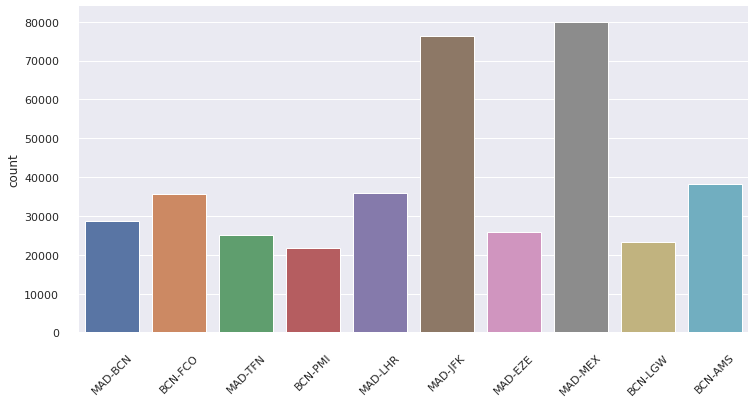

In [170]:
plt.figure(figsize=(12,6))
sns.countplot(routes)
sns.despine(offset=10, trim=True);
plt.xticks(rotation=45);

* MAD-JFK (Madrid-New York) and MAD-MEX (Madrid-Mexico City) are the busiest routes. The rest of them have a similar traffic.
* Maybe we can add a new categorical variable with the route. 

### Airlines

In [171]:
flights[['airlines', 'route']]

,airlines,route
0,UX,MAD -> BCN
1,VY,MAD -> BCN
2,IB,MAD -> BCN
3,UX,MAD -> BCN
4,UX,MAD -> BCN
...,...,...
421886,"VY, TP",BCN -> FCO
421887,"FR, VY",BCN -> FCO
421888,"VY, FR, EI",BCN -> FCO
421889,"VY, FR, EI",BCN -> FCO


* Airlines column show the carrier that manage a given flight. Hopping flights have more than one airline.

In [172]:
airlines = {'UX'}
flights['hopping'] = flights['airlines'].apply(lambda x: 1 if len(x.split(',')) > 1 else 0)

In [173]:
flights['hopping'].value_counts()

1    223610
0    167108
Name: hopping, dtype: int64

In [174]:
direct = flights[flights['hopping'] == 0]

In [175]:
main_airlines = direct['airlines'].unique()

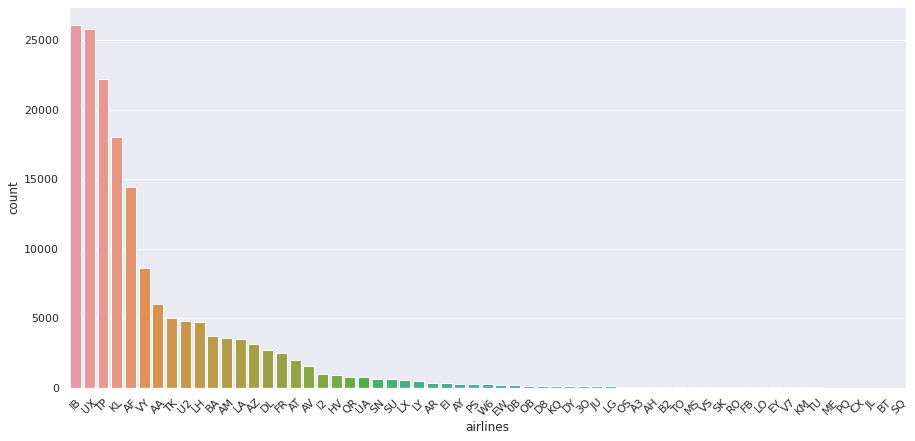

In [176]:
plt.figure(figsize=(15,7))
sns.countplot(direct['airlines'], order = direct['airlines'].value_counts().index)
plt.xticks(rotation=45);

### Flight_no

In [177]:
flights['flight_no'].head()

0    UX7703
1    VY1003
2    IB1946
3    UX6097
4    UX6067
Name: flight_no, dtype: object

* flight_no identifies a unique plain. Using this variable we can show price evolution a concrete flight through days. For example:

In [178]:
plain_id = 'UX7703'

In [179]:
flights_UX7703 = subset_flights(flights, 'MAD', 'BCN', '2021-02-08', '15:00', plain_id)

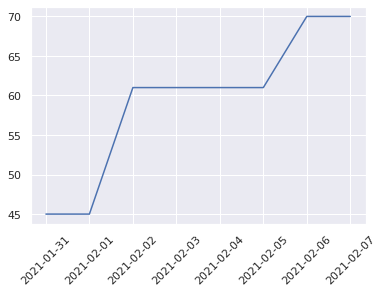

In [188]:
plt.plot(flights_UX7703['collectionDate'], flights_UX7703['price']);
plt.xticks(rotation=45);

### Fly_duration

### Distance

### Route

In [182]:
# TODO: route col broken in flights collected before 24 feb. USE airlines length-1 instead

In [190]:
flights['route'].head()

0    MAD -> BCN
1    MAD -> BCN
2    MAD -> BCN
3    MAD -> BCN
4    MAD -> BCN
Name: route, dtype: object

* This variable shows the hops in a flight route between origin and destination
* We can use this to create a new columns that computes the number of hops

In [211]:
flights['hopping'] = flights['airlines'].apply(lambda x: x.split()).apply(len)-1

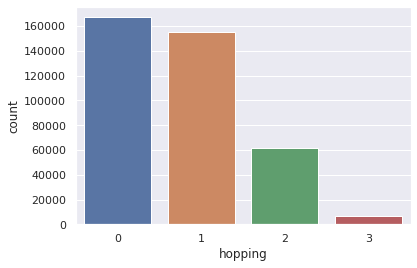

In [213]:
sns.countplot(flights['hopping']);

### Seats

In [215]:
flights['seats'].isna().sum()

82800

In [219]:
flights['seats'].isna().sum() / flights.shape[0]

0.21191754667048868

* This column has many NaN values (21.19%).

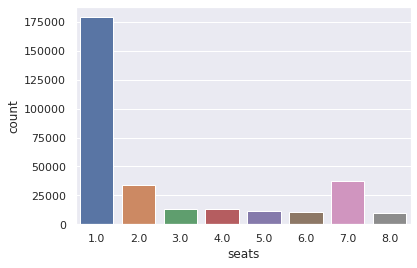

In [221]:
sns.countplot(flights['seats']);

* There are no 0's so maybe NaN values represent a 0?

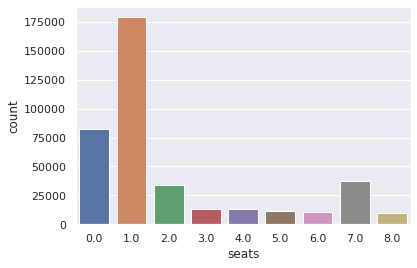

In [222]:
sns.countplot(flights['seats'].fillna(0));

### City Aliases¿?

In [183]:
# TODO: hacerme un selector de rutas
# TODO: plotear los histogramas del precio por ruta
# Generalista o por rutas?

In [184]:
# Selecting Madrid-London route
mad_lon = subset_by_route(flights, ('MAD', 'LHR'))

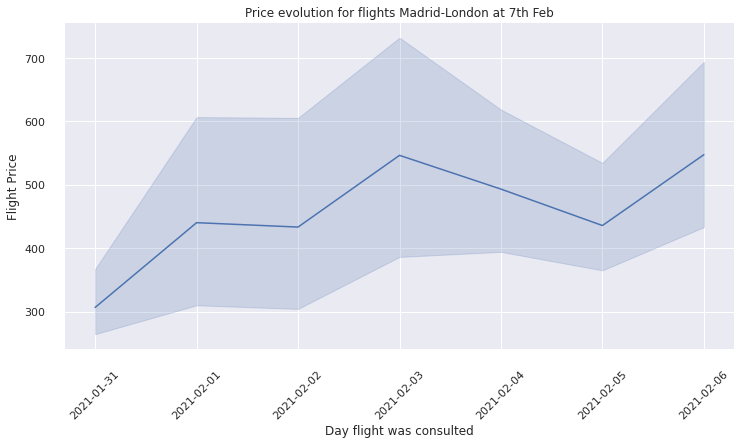

In [185]:
departure_day = '2021-02-07'
mad_lon_07_02 = mad_lon[mad_lon['dDate'] == departure_day]
mad_lon_07_02.groupby('collectionDate')['price'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x='collectionDate', y='price',data=mad_lon_07_02);
#plt.plot(mad_lon_07_02['collectionDate'], mad_lon_07_02['price'])
plt.xlabel('Day flight was consulted');
plt.ylabel('Flight Price')
plt.title('Price evolution for flights Madrid-London at 7th Feb');
sns.despine(offset=10, trim=True);
plt.xticks(rotation=45);
